<a href="https://colab.research.google.com/github/VictorMoralesE/Transportation-Energy-Data-Book-/blob/Results/ediciones_individuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyMuPDF
!pip install "camelot-py[cv]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 27.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of camelot-py[cv] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.3 MB/s eta 0:00:00


                       Mode  Fuel Type  Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5      210.3      61.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      210.3      15.3          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      210.3       0.8          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9     388.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9      44.1          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9       0.0          0.0                      0.0       0.0          

<ipython-input-3-20f9f82166c1>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


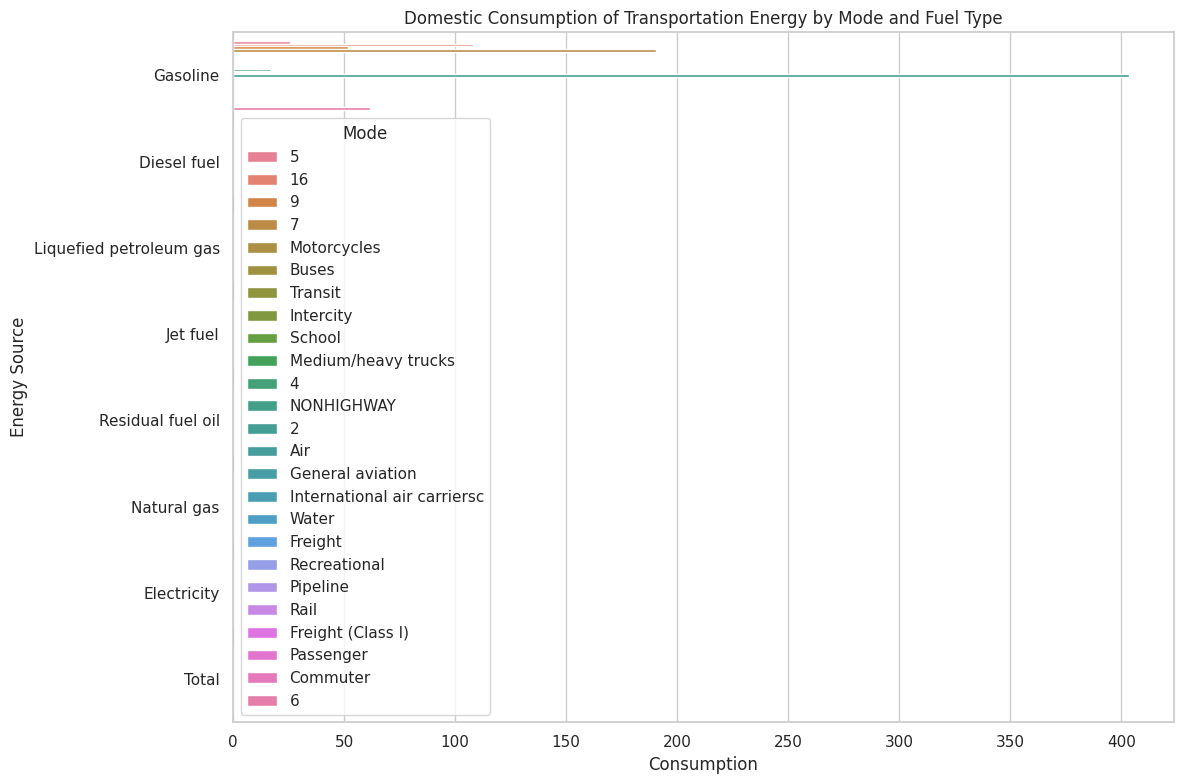

In [ ]:
#Edicion 27

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition27_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 28

                       Mode  Fuel Type  Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5      288.9      62.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      288.9      18.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      288.9       0.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      485.5     394.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      485.5      44.9          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          9      166.6      51.6          0.0                      0.0       0.0          

<ipython-input-4-a98feb49ab02>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


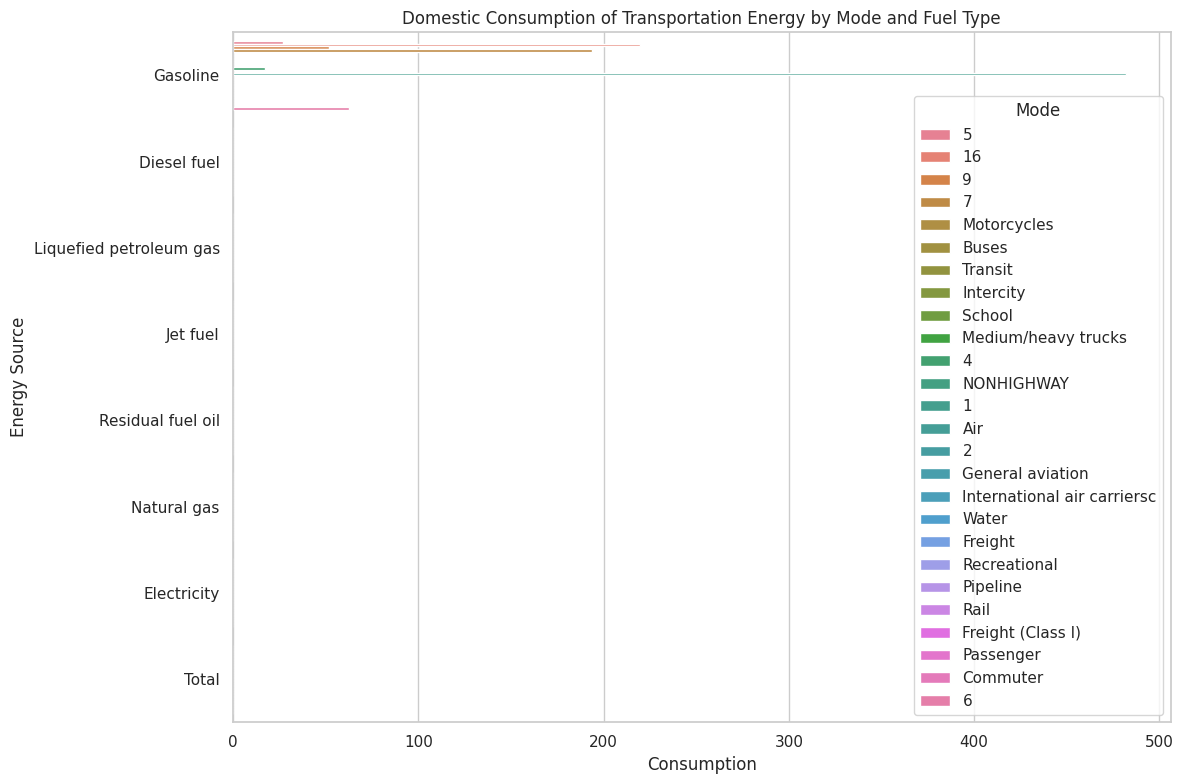

In [ ]:
#Edicion 28

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition28_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# # Visualizacion y analisis de la informacion para la edicion 29

                       Mode  Fuel Type  Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5       60.8      61.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       60.8      20.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       60.8       0.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16        1.9     389.1          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16        1.9      44.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16        1.9       0.0          0.0                      0.0       0.0          

<ipython-input-5-a146342758be>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


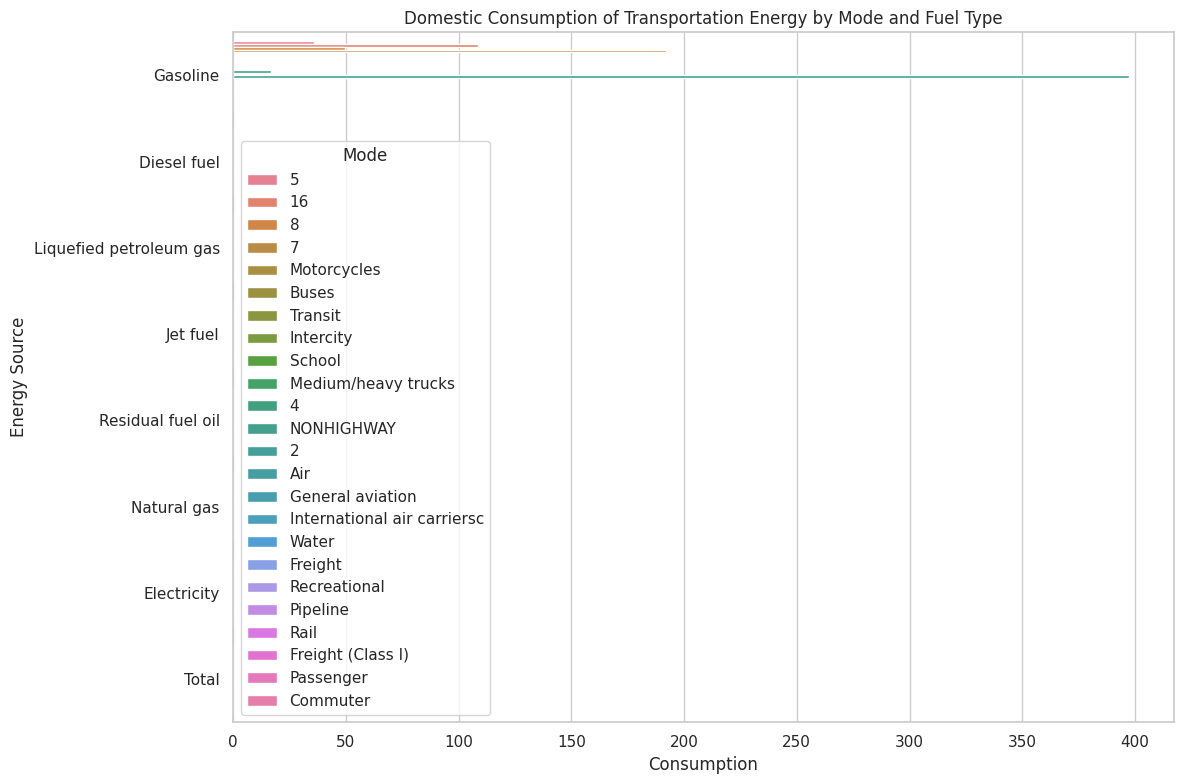

In [ ]:
#Edicion 29

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition29_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

#  Visualizacion y analisis de la informacion para la edicion 30

                       Mode          Fuel Type  Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          6 013.6         65.3      22.0          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6 013.6         65.3       0.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16              042.1     391.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16              042.1      45.0          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16              042.1       0.0          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16              042.1       0.0  

<ipython-input-6-36616287c5ce>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


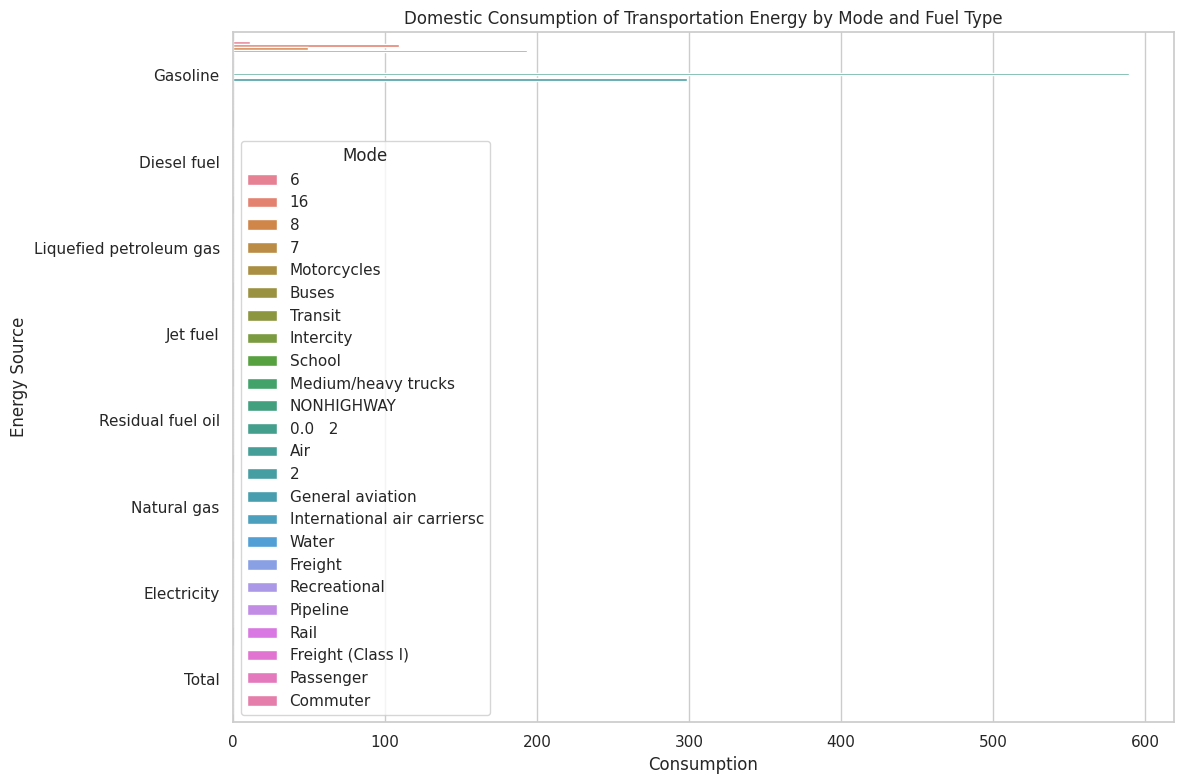

In [ ]:
#Edicion 30

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition30_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 31

                       Mode   Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          6       077.8             67.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6       077.8                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6       077.8                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6       077.8             19.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6       077.8              0.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         15       811.5            403.4  

<ipython-input-16-fea764710430>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


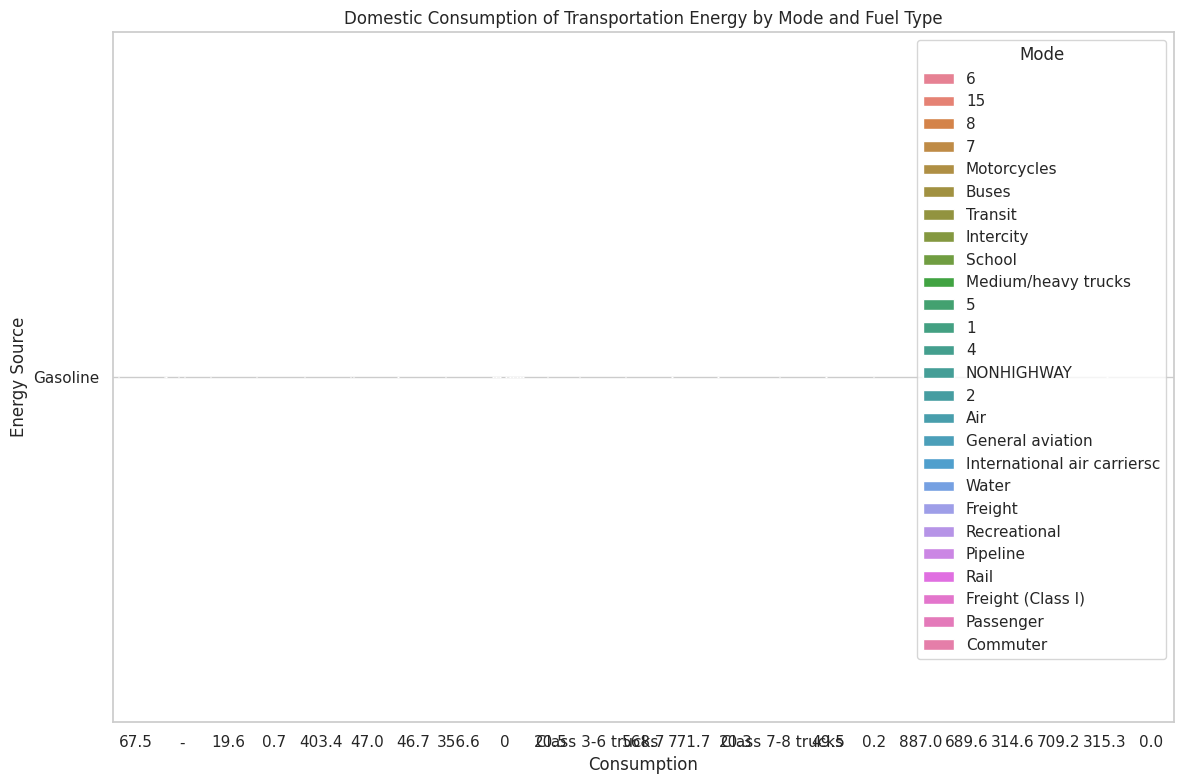

In [ ]:
#Edicion 31

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition31_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 32

                       Mode   Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5       751.1             64.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       751.1                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       751.1                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       751.1             20.2          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       751.1              0.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         15       388.4            389.5  

<ipython-input-19-3c1e5daf2b39>:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


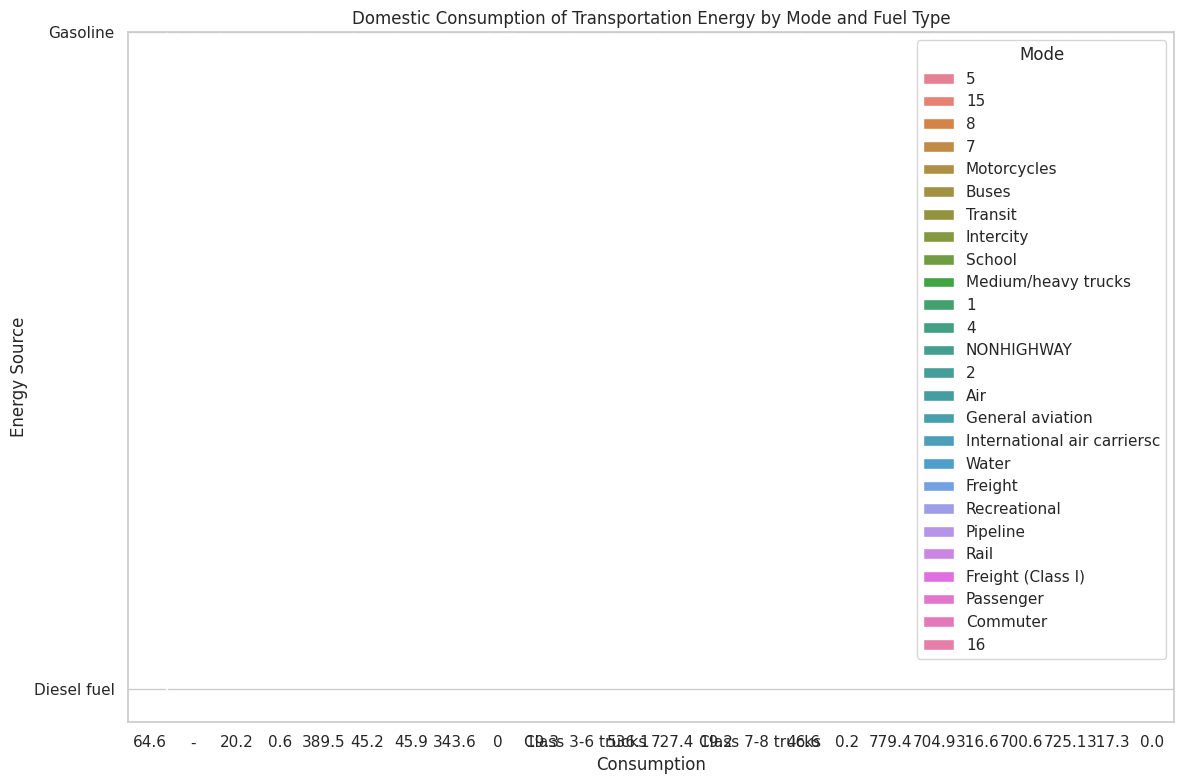

In [ ]:
#Edicion 32

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition32_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')


    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 33

                       Mode Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5     755.4             67.8          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5     755.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5     755.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5     755.4             19.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5     755.4              0.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         14     904.2            408.5          0.0   

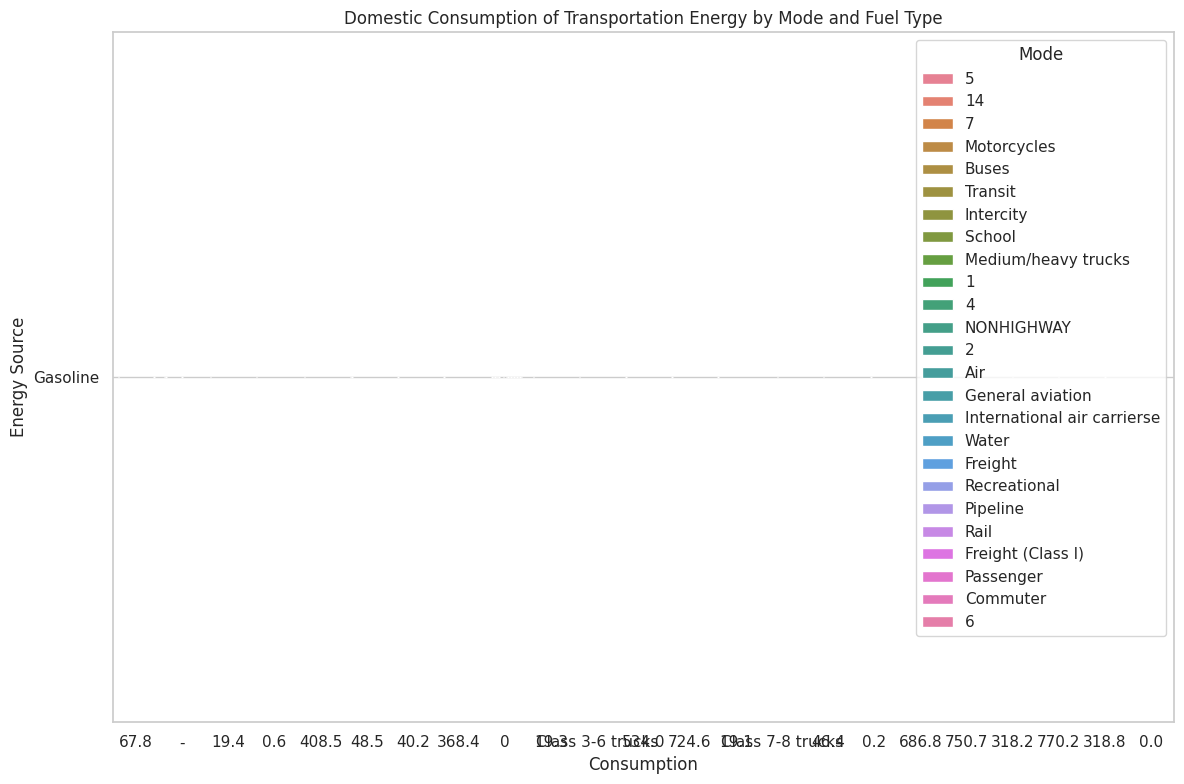

In [ ]:
#Edicion 33
import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition33_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 34

                       Mode   Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5       885.8             68.2          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       885.8                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       885.8                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       885.8             20.3          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5       885.8              0.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         14       730.7            403.4  

<ipython-input-22-59c8b5d18afd>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


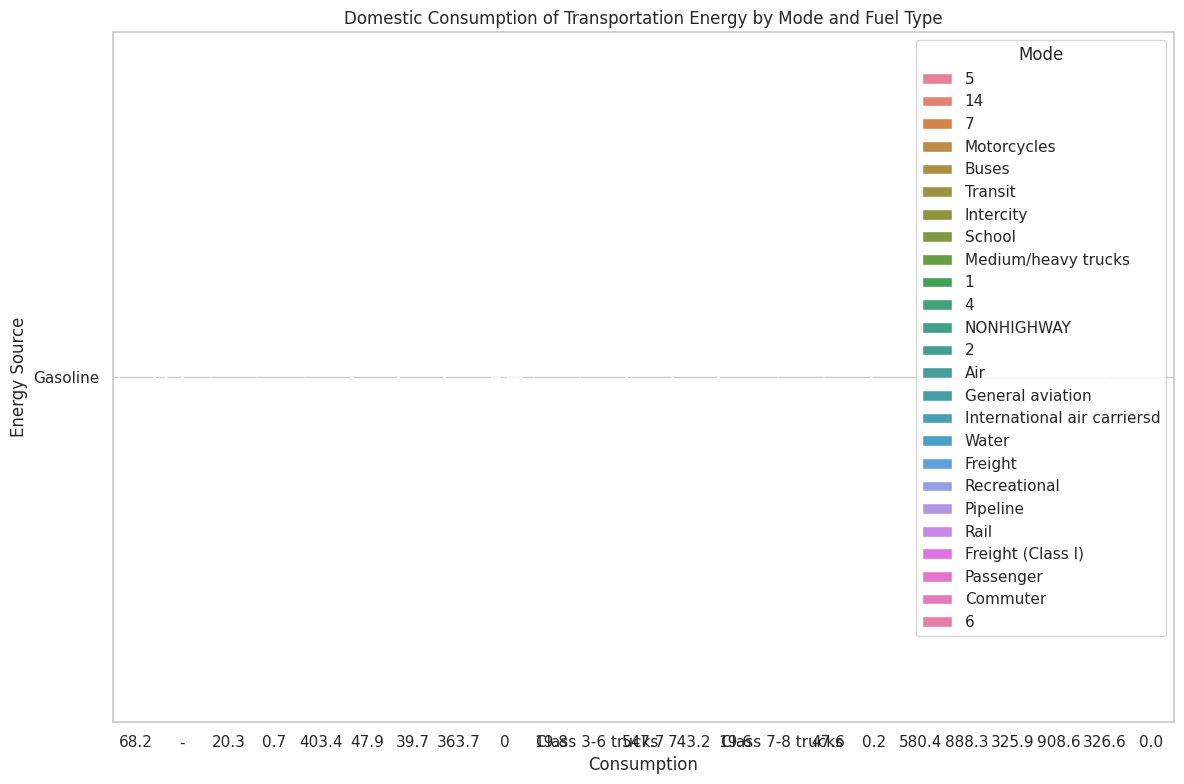

In [ ]:
#Edicion 34

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition34_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 35

                       Mode         Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5             992.4             71.1          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4             21.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4              3.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                      

<ipython-input-23-6f2e63e6a985>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


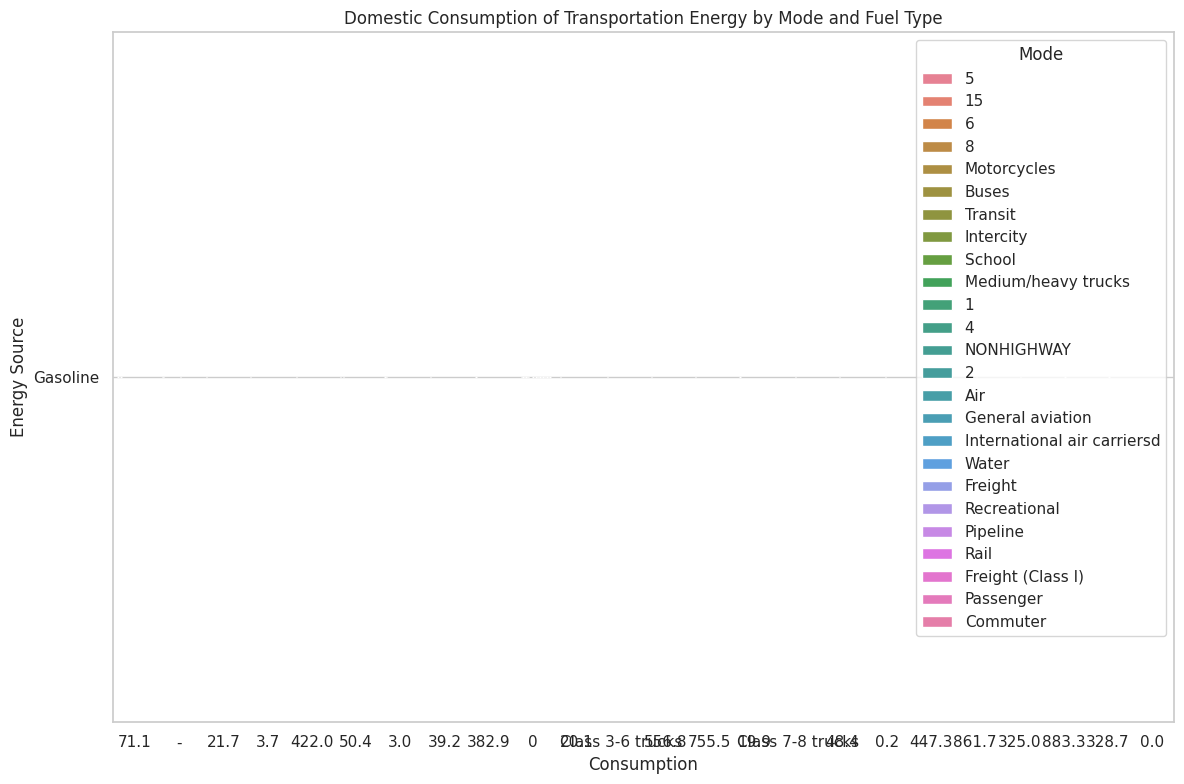

In [ ]:
#Edicion 35

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition35_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 36

                       Mode         Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5             992.4             71.1          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4             21.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5             992.4              3.7          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                      

<ipython-input-25-40094f4e1162>:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


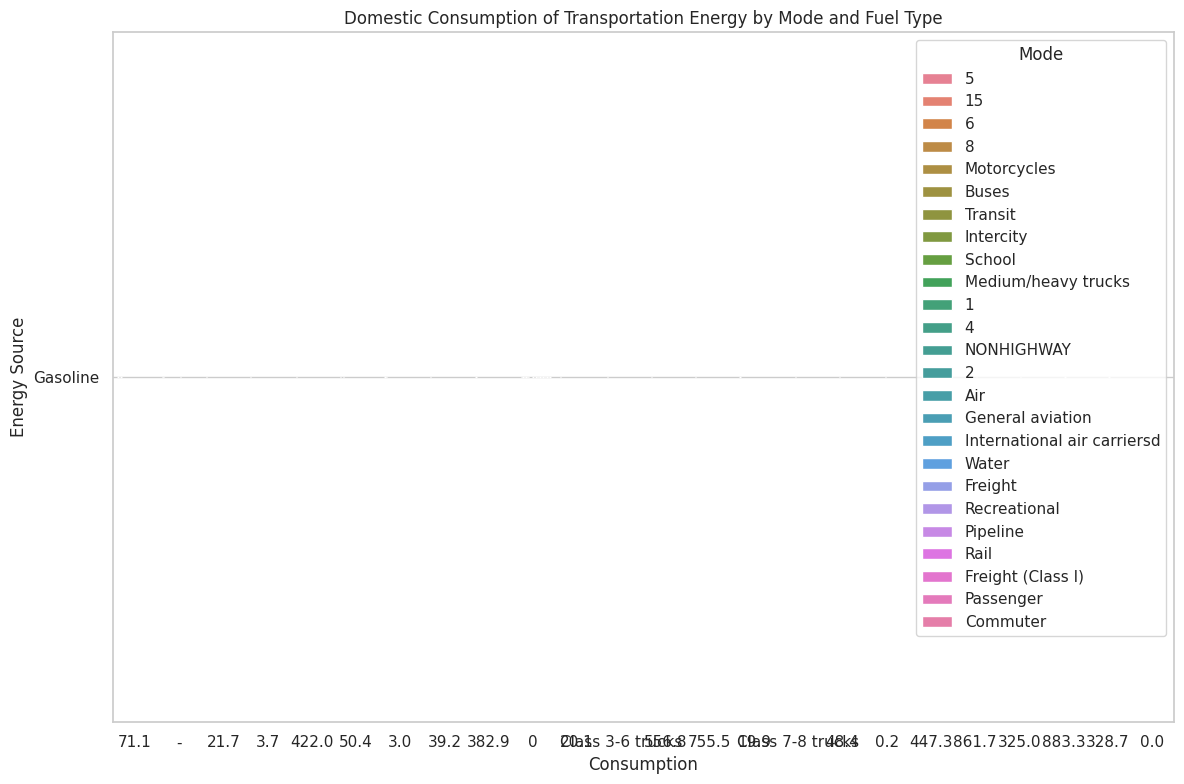

In [ ]:
#Edicion 36

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition36_Full_Doc.pdf"

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 37

                       Mode Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          6     121.0             74.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     121.0                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     121.0                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     121.0             23.3          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     121.0              5.0          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         15     023.9            443.2          0.0   

<ipython-input-26-6f9632a8adcc>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


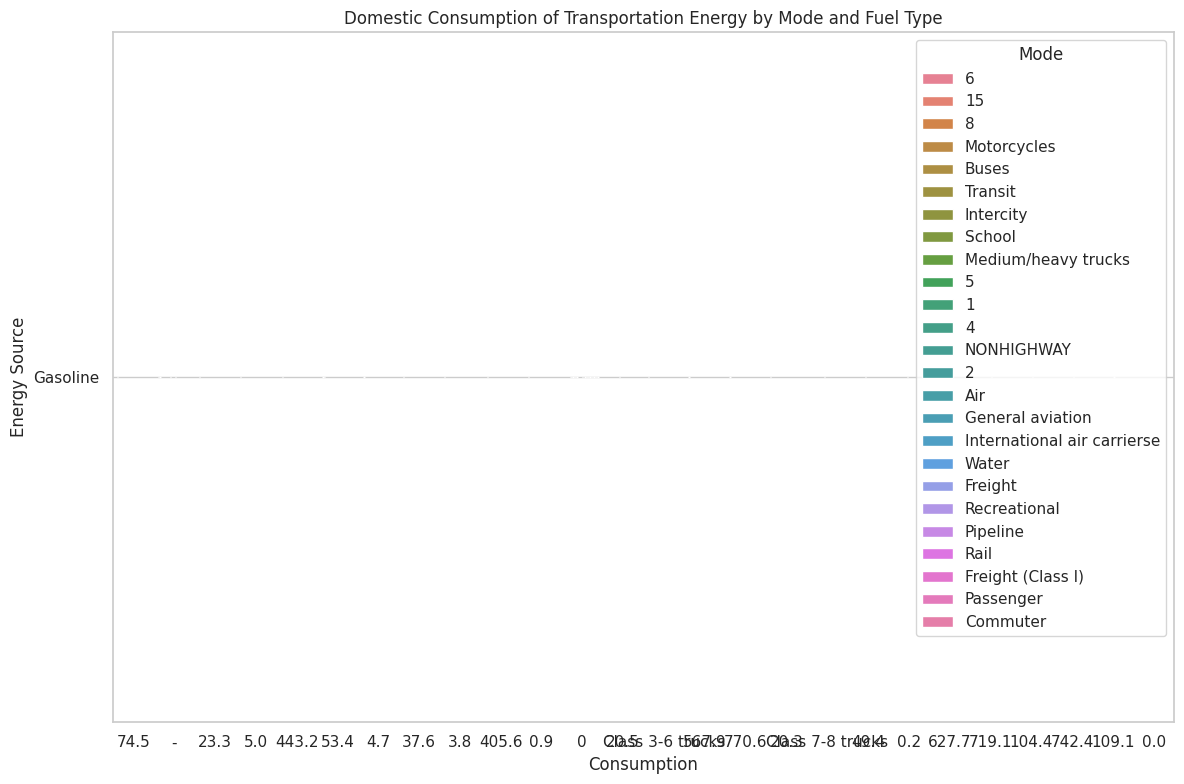

In [ ]:
#Edicion 37

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2020/02/Edition37_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 38

In [ ]:
#Edicion 38

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2021/02/Edition38_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 39

                       Mode Fuel Type         Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          6     324.3             75.3          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     324.3                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     324.3                -          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     324.3             25.4          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          6     324.3              9.8          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         14     717.5            444.9          0.0   

<ipython-input-28-9e23669790c4>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)


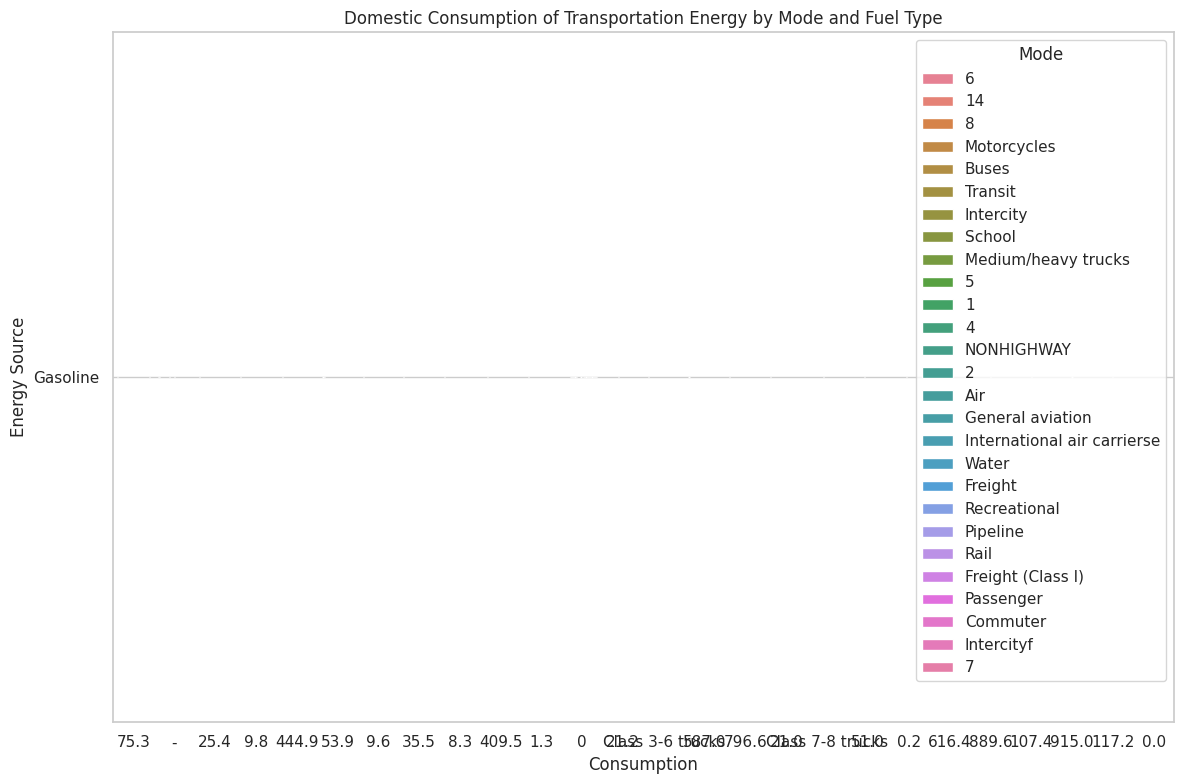

In [ ]:
#Edicion 39

import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://info.ornl.gov/sites/publications/Files/Pub147659.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

# Visualizacion y analisis de la informacion para la edicion 40